# Raster calculations

In [1]:
import pystac

In [2]:
items = pystac.ItemCollection.from_file("search.json")

In [3]:
item = items[1]

In [4]:
red_href = item.assets["red"].href
nir_href = item.assets["nir"].href

In [5]:
import rioxarray

In [6]:
red = rioxarray.open_rasterio(red_href, masked=True)
nir = rioxarray.open_rasterio(nir_href, masked=True)

In [7]:
red

<xarray.DataArray (band: 1, y: 10980, x: 10980)>
[120560400 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

In [8]:
bbox = (629_000, 5_804_000, 639_000, 5_814_000)

In [11]:
import pyproj
crs = pyproj.CRS(red.rio.crs.to_epsg())

In [12]:
crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
red_clip = red.rio.clip_box(*bbox)
nir_clip = nir.rio.clip_box(*bbox)

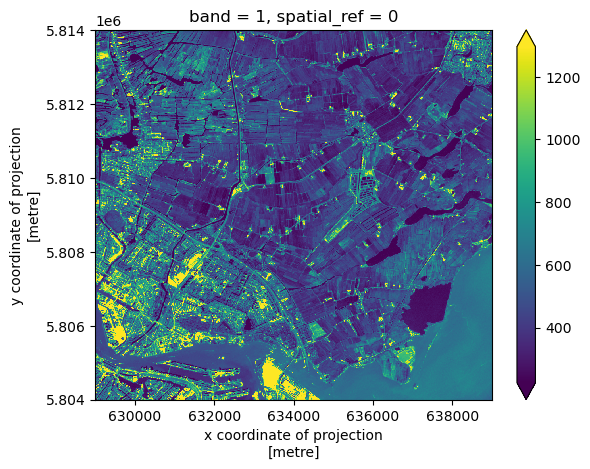

In [15]:
red_clip.plot(robust=True)

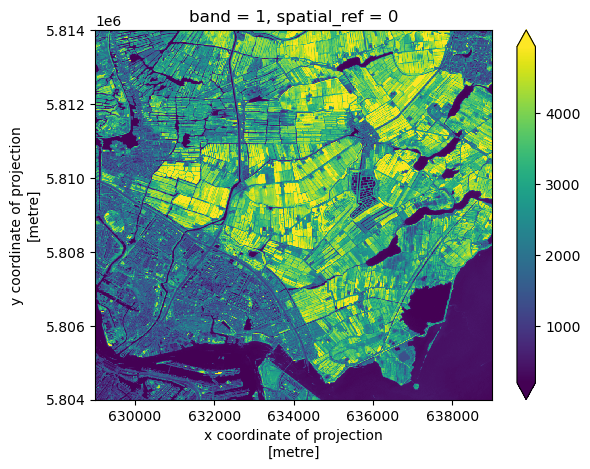

In [16]:
nir_clip.plot(robust=True)

In [18]:
red_clip.rio.crs, nir_clip.rio.crs

(CRS.from_epsg(32631), CRS.from_epsg(32631))

In [23]:
# red_clip.rolling(x=3, y=3).median()

In [20]:
red_clip_reprojected = red_clip.rio.reproject_match(nir_clip)

<xarray.DataArray (band: 1, y: 1000, x: 1000)>
array([[[549., 447., 512., ..., 584., 402., 435.],
        [450., 476., 544., ..., 460., 409., 445.],
        [443., 550., 474., ..., 433., 422., 537.],
        ...,
        [830., 705., 306., ..., 591., 585., 580.],
        [843., 427., 192., ..., 586., 575., 587.],
        [636., 267., 153., ..., 577., 576., 568.]]], dtype=float32)
Coordinates:
  * x            (x) float64 6.29e+05 6.29e+05 6.29e+05 ... 6.39e+05 6.39e+05
  * y            (y) float64 5.814e+06 5.814e+06 ... 5.804e+06 5.804e+06
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

In [24]:
ndvi = (nir_clip - red_clip)/(nir_clip + red_clip) 

In [26]:
ndvi.rio.crs

CRS.from_epsg(32631)

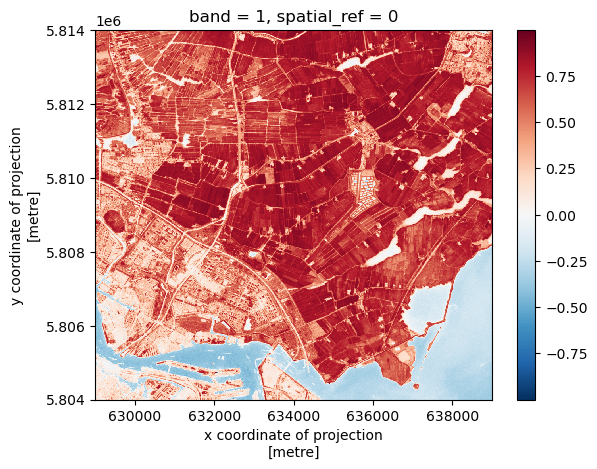

In [27]:
ndvi.plot()

(array([5.00000e+00, 2.00000e+00, 1.06730e+04, 8.93370e+04, 3.18520e+04,
        7.91100e+04, 1.11035e+05, 1.56887e+05, 3.05459e+05, 2.15636e+05]),
 array([-9.98356640e-01, -7.98577428e-01, -5.98798275e-01, -3.99019092e-01,
        -1.99239910e-01,  5.39273024e-04,  2.00318456e-01,  4.00097638e-01,
         5.99876821e-01,  7.99656034e-01,  9.99435186e-01]),
 <BarContainer object of 10 artists>)

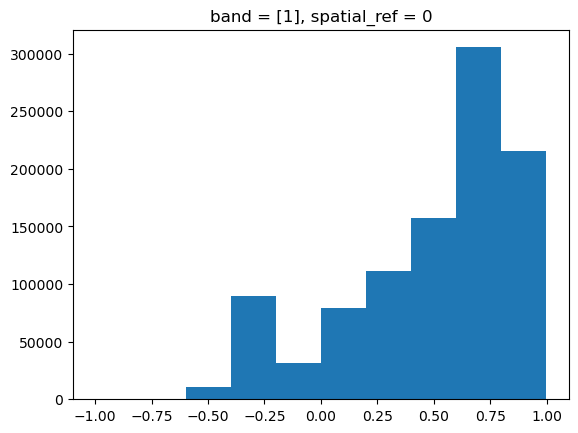

In [28]:
ndvi.plot.hist()

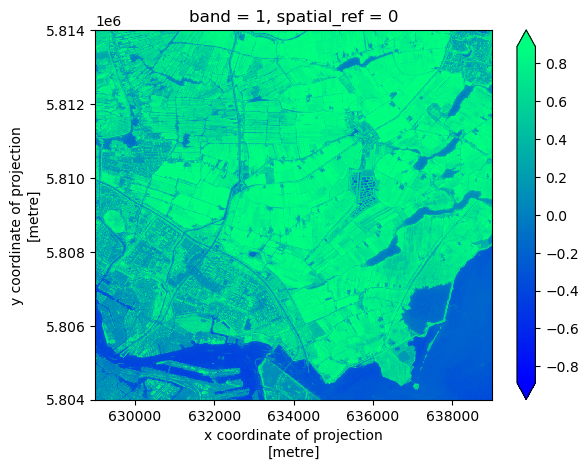

In [34]:
ndvi.plot(robust=True, cmap="winter")
# check: from matplotlib.colors import ListedColormap

#### Exercise: Explore NDVI Raster Values

It’s often a good idea to explore the range of values in a raster dataset just like we might explore a dataset that we collected in the field. The histogram we just made is a good start but there’s more we can do to improve our understanding of the data.
1. What is the min and maximum value for the NDVI raster (`ndvi`) that we just created? Are there missing values?
2. Plot a histogram with 50 bins instead of 8. What do you notice that wasn’t clear before?
3. Plot the `ndvi` raster using breaks that make sense for the data.


In [35]:
ndvi.min()

<xarray.DataArray ()>
array(-0.99835664, dtype=float32)
Coordinates:
    spatial_ref  int64 0

In [36]:
ndvi.max()

<xarray.DataArray ()>
array(0.9994352, dtype=float32)
Coordinates:
    spatial_ref  int64 0

In [41]:
None

In [44]:
import numpy as np
np.nan

nan

In [45]:
red_clip.isnull().sum()

<xarray.DataArray ()>
array(4)
Coordinates:
    spatial_ref  int64 0

In [40]:
ndvi.isnull().sum()

<xarray.DataArray ()>
array(4)
Coordinates:
    spatial_ref  int64 0

In [29]:
# get documentation from xarray's hist
ndvi.plot.hist?

Signature:
ndvi.plot.hist(
    *args: 'Any',
    figsize: 'Iterable[float] | None' = None,
    size: 'float | None' = None,
    aspect: 'AspectOptions' = None,
    ax: 'Axes | None' = None,
    xincrease: 'bool | None' = None,
    yincrease: 'bool | None' = None,
    xscale: 'ScaleOptions' = None,
    yscale: 'ScaleOptions' = None,
    xticks: 'ArrayLike | None' = None,
    yticks: 'ArrayLike | None' = None,
    xlim: 'ArrayLike | None' = None,
    ylim: 'ArrayLike | None' = None,
    **kwargs: 'Any',
) -> 'tuple[np.ndarray, np.ndarray, BarContainer]'
Docstring:
Histogram of DataArray.

Wraps :py:func:`matplotlib:matplotlib.pyplot.hist`.

Plots *N*-dimensional arrays by first flattening the array.

Parameters
----------
darray : DataArray
    Can have any number of dimensions.
figsize : Iterable of float, optional
    A tuple (width, height) of the figure in inches.
    Mutually exclusive with ``size`` and ``ax``.
aspect : "auto", "equal", scalar or None, optional
    Aspect ratio of p

In [30]:
import matplotlib

In [31]:
# more details about arguments in hist
matplotlib.pyplot.hist?

Signature:
matplotlib.pyplot.hist(
    x,
    bins=None,
    range=None,
    density=False,
    weights=None,
    cumulative=False,
    bottom=None,
    histtype='bar',
    align='mid',
    orientation='vertical',
    rwidth=None,
    log=False,
    color=None,
    label=None,
    stacked=False,
    *,
    data=None,
    **kwargs,
)
Docstring:
Compute and plot a histogram.

This method uses `numpy.histogram` to bin the data in *x* and count the
number of values in each bin, then draws the distribution either as a
`.BarContainer` or `.Polygon`. The *bins*, *range*, *density*, and
*weights* parameters are forwarded to `numpy.histogram`.

If the data has already been binned and counted, use `~.bar` or
`~.stairs` to plot the distribution::

    counts, bins = np.histogram(x)
    plt.stairs(counts, bins)

Alternatively, plot pre-computed bins and counts using ``hist()`` by
treating each bin as a single point with a weight equal to its count::

    plt.hist(bins[:-1], bins, weights=counts)



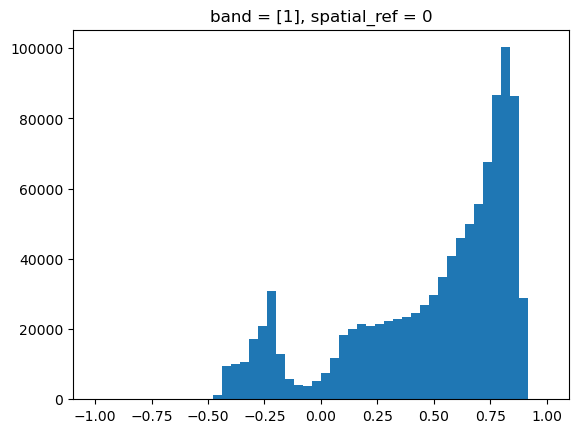

In [47]:
ndvi.plot.hist(bins=50) ;

In [49]:
ndvi.plot.imshow?

Signature:
ndvi.plot.imshow(
    *args: 'Any',
    x: 'Hashable | None' = None,
    y: 'Hashable | None' = None,
    figsize: 'Iterable[float] | None' = None,
    size: 'float | None' = None,
    aspect: 'float | None' = None,
    ax: 'Axes | None' = None,
    row: 'Hashable | None' = None,
    col: 'Hashable | None' = None,
    col_wrap: 'int | None' = None,
    xincrease: 'bool | None' = True,
    yincrease: 'bool | None' = True,
    add_colorbar: 'bool | None' = None,
    add_labels: 'bool' = True,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    cmap: 'str | Colormap | None' = None,
    center: 'float | None' = None,
    robust: 'bool' = False,
    extend: 'ExtendOptions' = None,
    levels: 'ArrayLike | None' = None,
    infer_intervals=None,
    colors: 'str | ArrayLike | None' = None,
    subplot_kws: 'dict[str, Any] | None' = None,
    cbar_ax: 'Axes | None' = None,
    cbar_kwargs: 'dict[str, Any] | None' = None,
    xscale: 'ScaleOptions' = None,
    ysca

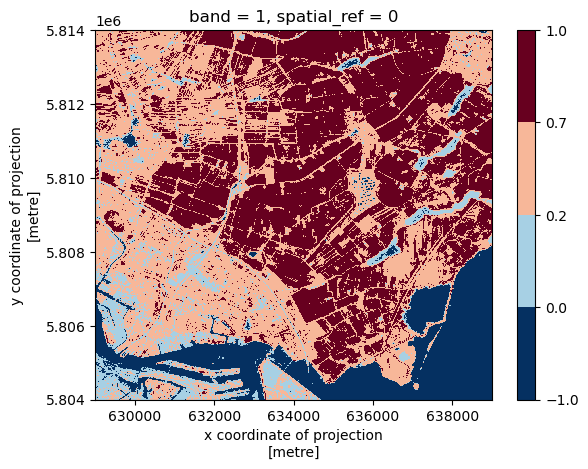

In [50]:
class_bins = (-1, 0., 0.2, 0.7, 1)
ndvi.plot(levels=class_bins)

In [53]:
ndvi_interpolated = ndvi.interpolate_na(dim="x")

In [55]:
ndvi_interpolated.isnull().sum()

<xarray.DataArray ()>
array(0)
Coordinates:
    spatial_ref  int64 0

In [56]:
ndvi_interpolated.rio.to_raster("NDVI.tif")